## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [153]:
import numpy as np
import pandas as pd
from modules.data_preprocessing import clean_raw, loader
import seaborn as sns
from modules.weather import harvest_weather_data, clean_weather
pd.options.mode.chained_assignment = None

In [2]:
'''
clean_raw cleans and formats the raw data best for exploring
highlight clean_raw, right click, and press 'go to definition' what exactly is being done.
'''
clean_raw(overwrite=True)

"\nclean_raw cleans and formats the raw data best for exploring\nhighlight clean_raw, right click, and press 'go to definition' what exactly is being done.\n"

In [154]:
all_months = loader(joined=True)
# a list of 12 dataframes (one for each month) containing one time and delayed flights.

mega = loader(mega_df=True)
# one dataframe containing all gathered and cleaned data.

In [158]:
all_months[0]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,total_delay
0,1,AA,5607,OH,N254PS,5607,"HARTFORD, CT","WASHINGTON, DC",11,13,94,313,27
1,1,AA,5607,OH,N254PS,5607,"WASHINGTON, DC","HARTFORD, CT",10,11,77,313,18
2,1,AA,5613,OH,N242JS,5613,"WASHINGTON, DC","CLEVELAND, OH",22,23,83,310,7
3,1,AA,5615,OH,N703PS,5615,"CHARLOTTE, NC","ASHEVILLE, NC",17,18,50,91,18
4,1,AA,5646,OH,N574NN,5646,"DETROIT, MI","CHARLOTTE, NC",19,21,116,500,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,DL,3813,OO,N276SY,3813,"CHICAGO, IL","NEW YORK, NY",9,12,130,733,-17
99996,1,DL,3814,OO,N912EV,3814,"DETROIT, MI","HARRISBURG, PA",15,17,104,371,-36
99997,1,DL,3814,OO,N912EV,3814,"HARRISBURG, PA","DETROIT, MI",17,19,107,371,-24
99998,1,DL,3815,OO,N269SY,3815,"NEW YORK, NY","GREENSBORO/HIGH POINT, NC",18,20,116,461,-15


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import plotly.express as px

In [5]:
stat, p = normaltest(all_months[0].iloc[:,12])
print('january:\n   p - ',p, '\n   stat - ',stat,'\n')

stat, p = normaltest(mega.iloc[:,12])
print('all months:\n   p - ',p, '\n   stat - ',stat)

january:
   p -  0.0 
   stat -  93979.4300302158 

all months:
   p -  0.0 
   stat -  1070626.999360525


Both strongly reject null hypo of having a normal distribution

(distributions for jan and all months are not normal.)

Text(0.5, 1.0, 'all months')

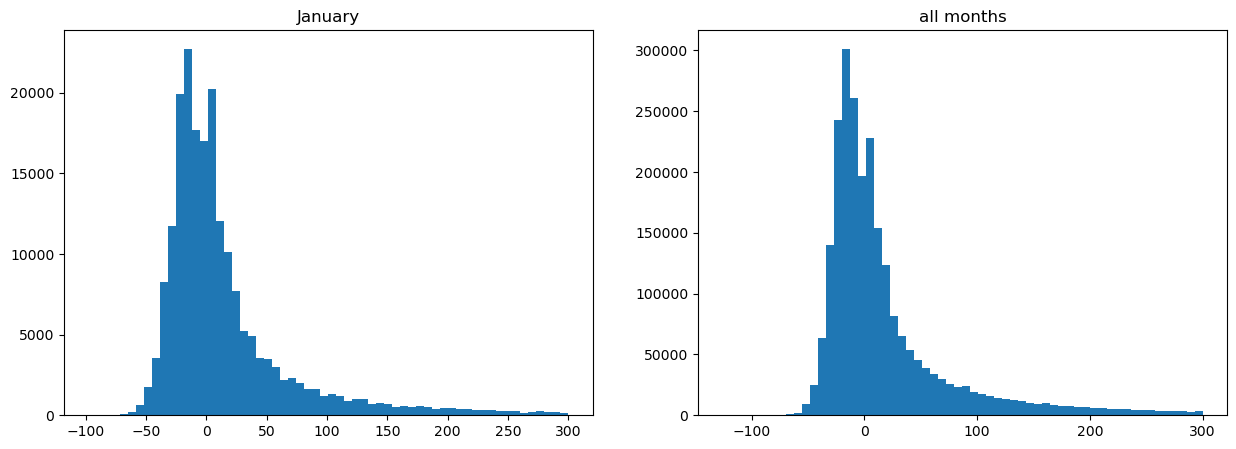

In [6]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(all_months[0].iloc[:,12],bins=60)
axs[0].set_title('January')

axs[1].hist(mega.iloc[:,12],bins=60)
axs[1].set_title('all months')

In [7]:
print('avg delay for all months =',np.mean(mega.total_delay),'minutes')

avg delay for all months = 18.101445 minutes


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [8]:
for i, month in enumerate(all_months):
    print(f'avg delay for month {i+1} = {np.mean(all_months[i].total_delay)}')

avg delay for month 1 = 15.054955
avg delay for month 2 = 18.23945
avg delay for month 3 = 18.25121
avg delay for month 4 = 19.3211
avg delay for month 5 = 19.866395
avg delay for month 6 = 20.643835
avg delay for month 7 = 20.314605
avg delay for month 8 = 20.70746
avg delay for month 9 = 17.141075
avg delay for month 10 = 15.25206
avg delay for month 11 = 14.321755
avg delay for month 12 = 18.10344


Lowest avg delay is November and highest is summer seasons especially Jun - Aug (likely summer break family vacation stuff etc)

It then cools down and rises sharply in December (holiday travel chaos).

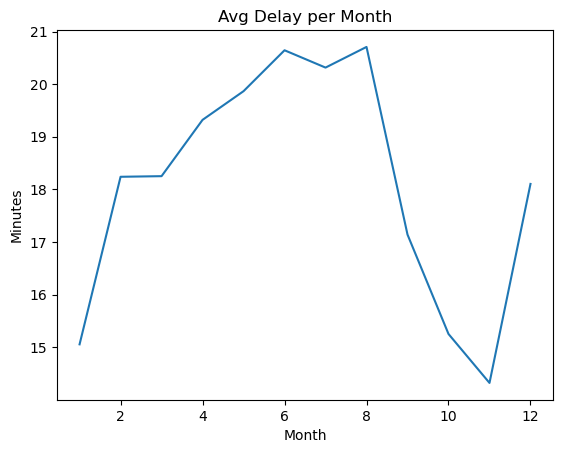

In [9]:
plt.plot([i+1 for i in range(12)],[np.mean(all_months[i].total_delay) for i in range(12)])
plt.title('Avg Delay per Month')
plt.ylabel('Minutes')
plt.xlabel('Month')
plt.show()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [10]:
# Collect weather data for a sample and join it to the sample
dirty_df = pd.concat([pd.read_csv('../data/messy_data_EDA/EDA_delayed.csv'), pd.read_csv('../data/messy_data_EDA/EDA_on_time.csv')])
#weather_sample = harvest_weather_data(df = dirty_df[['origin_city_name','fl_date']],save=True,prefix='dirty_sample')
weather_sample = pd.read_csv('../data/weather/dirty_sampleweather_data.csv',index_col=0)
weather_sample = clean_weather(weather_sample.weather)
weather_sample.reset_index(inplace=True,drop=True)
dirty_df.reset_index(inplace=True,drop=True)
dirty_weather_df = pd.concat([dirty_df,weather_sample],axis=1)

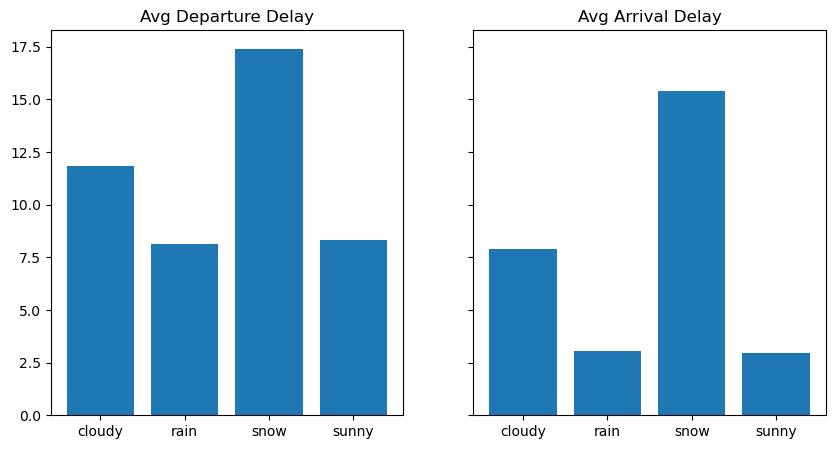

In [11]:
fix, ax = plt.subplots(1,2,figsize=(10,5),sharey=True)
ax[0].bar(['cloudy','rain','snow','sunny'], dirty_weather_df.groupby(by='weather').dep_delay.mean())
ax[0].set_title('Avg Departure Delay')
ax[1].bar(['cloudy','rain','snow','sunny'], dirty_weather_df.groupby(by='weather').arr_delay.mean())
ax[1].set_title('Avg Arrival Delay')
plt.show()

In [35]:
from scipy.stats import f_oneway, ttest_ind

stat, p = f_oneway(dirty_weather_df[dirty_weather_df['weather'] == 'snow'].dep_delay,
                   dirty_weather_df[dirty_weather_df['weather'] == 'cloudy'].dep_delay,
                   dirty_weather_df[dirty_weather_df['weather'] == 'rain'].dep_delay,
                   dirty_weather_df[dirty_weather_df['weather'] == 'sunny'].dep_delay)
p
# Reject null, at least one is significantly different from the others.

6.818499555030985e-284

Text(0.5, 1.0, 'cloudy')

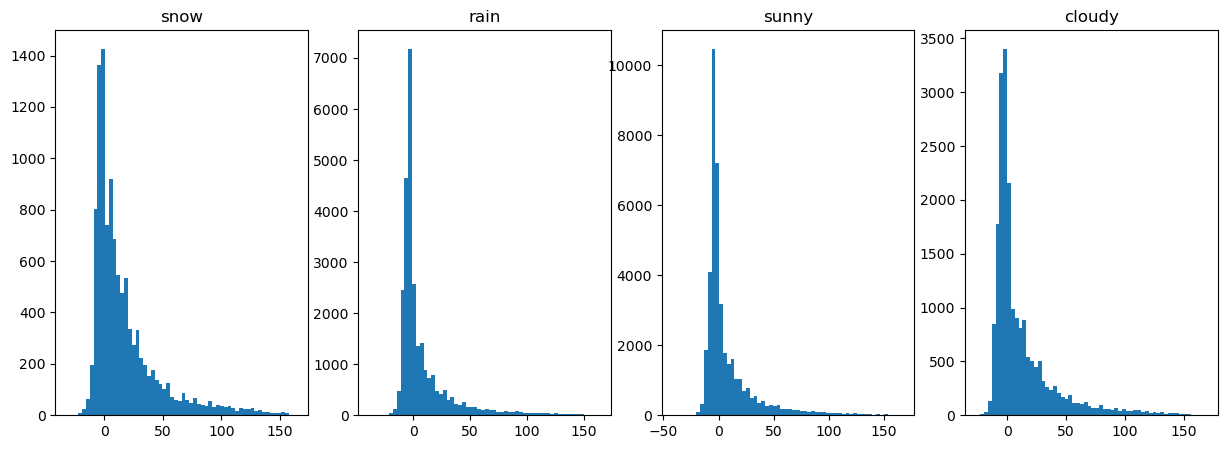

In [33]:
fig,axs = plt.subplots(1,4,figsize=(15,5))
axs[0].hist(dirty_weather_df[dirty_weather_df['weather'] == 'snow'].dep_delay,bins=60)
axs[0].set_title('snow')
axs[1].hist(dirty_weather_df[dirty_weather_df['weather'] == 'rain'].dep_delay,bins=60)
axs[1].set_title('rain')
axs[2].hist(dirty_weather_df[dirty_weather_df['weather'] == 'sunny'].dep_delay,bins=60)
axs[2].set_title('sunny')
axs[3].hist(dirty_weather_df[dirty_weather_df['weather'] == 'cloudy'].dep_delay,bins=60)
axs[3].set_title('cloudy')

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

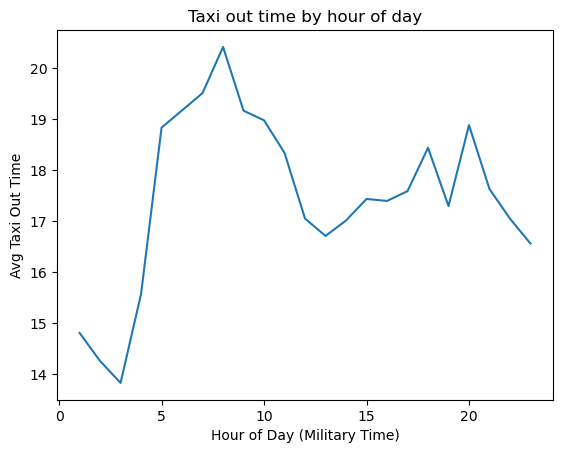

In [12]:
def get_hour(n):
    if(len(str(n))) == 4:
        return np.int8(str(n)[:2])
    else: return np.int8(str(n)[0])
tmp = dirty_df[['crs_dep_time','taxi_out']]
tmp.crs_dep_time = tmp.crs_dep_time.apply(get_hour)
a = tmp.groupby(by='crs_dep_time').mean()
plt.plot(a.index,a.taxi_out)
plt.xlabel('Hour of Day (Military Time)')
plt.ylabel('Avg Taxi Out Time')
plt.title('Taxi out time by hour of day')

plt.show()

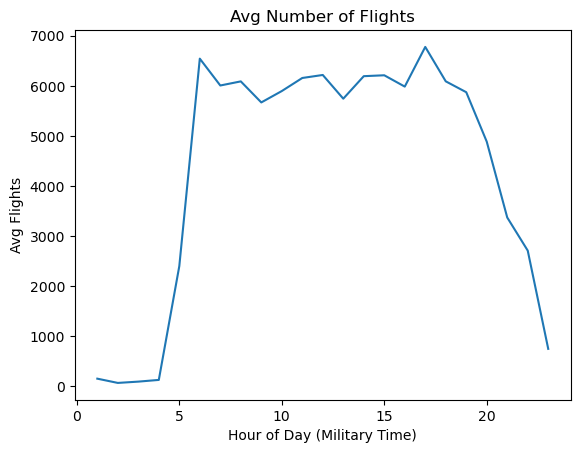

In [13]:
tmp = dirty_df[['crs_dep_time','taxi_out']]
tmp.crs_dep_time = tmp.crs_dep_time.apply(get_hour)
a = tmp.groupby(by='crs_dep_time').count()
plt.plot(a.index,a.taxi_out)
plt.xlabel('Hour of Day (Military Time)')
plt.ylabel('Avg Flights')
plt.title('Avg Number of Flights')
plt.show()

Of our data collected over 7 days we can see a clear pattern between traffic at a given time and taxi waits at a given time.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [14]:
print('percent of flights with departure delays \n',len(dirty_df[dirty_df['dep_delay'] > 0][['dep_delay','arr_delay']])/1000,'%\n')
print('percent of flights with departure delays that arrived early\n',len(dirty_df[(dirty_df['dep_delay'] > 0) & (dirty_df['arr_delay'] < 1)][['dep_delay','arr_delay']])/1000,'%\n')
print('percent of flights with departure delays that arrived late\n',len(dirty_df[(dirty_df['dep_delay'] > 0) & (dirty_df['arr_delay'] > 0)][['dep_delay','arr_delay']])/1000,'%\n')
print('percent of flights with departure delays that made up time but did not arrive early\n',len(dirty_df[(dirty_df['dep_delay'] > 0) & (dirty_df['arr_delay'] < dirty_df['dep_delay']) & (dirty_df['arr_delay'] > 0)][['dep_delay','arr_delay']])/1000,'%\n')

percent of flights with departure delays 
 45.272 %

percent of flights with departure delays that arrived early
 10.938 %

percent of flights with departure delays that arrived late
 34.334 %

percent of flights with departure delays that made up time but did not arrive early
 19.868 %



#### **Task 6**: How many states cover 50% of US air traffic? 
7 states

In [15]:
tmp = pd.concat([dirty_df.dest_city_name.str[-2:],dirty_df.origin_city_name.str[-2:]])
a =tmp.value_counts()[:7]

fig = px.bar(a,x=a.index,y=a.values,title='States by Occurence')
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'font' : {'color':'white'}
})
fig.update_xaxes(title='States')
fig.update_yaxes(title='Count')

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [16]:
tmp = dirty_df[['crs_elapsed_time','actual_elapsed_time','dep_delay','arr_delay']]
tmp = pd.concat([tmp,pd.Series((dirty_df.actual_elapsed_time - dirty_df.crs_elapsed_time),name='time_dif')],axis=1)
tmp.drop(['crs_elapsed_time','actual_elapsed_time'],axis=1,inplace=True)
print('percentage of flights with dep_delays:',(len(tmp[(tmp.dep_delay > 0)])/1000),'%')
print('percentage of dep_delay flights that flew faster than predicted:',(len(tmp[(tmp.dep_delay > 0)&(tmp.time_dif < 0)])/1000),'%')
print('percentage of dep_delay flights that flew slower than predicted:',(len(tmp[(tmp.dep_delay > 0)&(tmp.time_dif > 0)])/1000),'%')
print('percentage of dep_delay flights that flex the exact time predicted:',(len(tmp[(tmp.dep_delay > 0)&(tmp.time_dif == 0)])/1000),'%')

percentage of flights with dep_delays: 45.272 %
percentage of dep_delay flights that flew faster than predicted: 30.806 %
percentage of dep_delay flights that flew slower than predicted: 13.167 %
percentage of dep_delay flights that flex the exact time predicted: 1.299 %


There is a strong pattern of planes arriving faster when their departure is delayed. Likely due to them being expected for longer

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

[I found a resource that states:](https://www.themcggroup.com/blog/the-differences-between-longhaul-and-shorthaul-piloting/bp67/#:~:text=Short%2Dhaul%20is%20a%20flight,that%20extend%20beyond%206%20hours.)
- Short-haul is a flight lasting 30 mins - 3 hours
- Medium-haul lasts 3-6 hours
- Long-haul > 6 hours

In [17]:
print('longest flight is', dirty_df.crs_elapsed_time.max(),'minutes going between',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.max()].origin_city_name.values[0],'and',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.max()].dest_city_name.values[0])
print('shortest flight is', dirty_df.crs_elapsed_time.min(),'minutes going between',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.min()].origin_city_name.values[0],'and',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.min()].dest_city_name.values[0])
print('a median flight is', dirty_df.crs_elapsed_time.median(),'minutes going between',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.median()].origin_city_name.values[0],'and',dirty_df[dirty_df.crs_elapsed_time == dirty_df.crs_elapsed_time.median()].dest_city_name.values[0])

longest flight is 703 minutes going between New York, NY and Honolulu, HI
shortest flight is 24 minutes going between Petersburg, AK and Wrangell, AK
a median flight is 125.0 minutes going between Moline, IL and Atlanta, GA


In [18]:
color_col = pd.cut(dirty_df['crs_elapsed_time'], bins=[-float('inf'), 180, 360, float('inf')], labels=['Short-Haul', 'Medium-Haul', 'Long-Haul'])
fig = px.histogram(dirty_df,'crs_elapsed_time',nbins=30,text_auto=True,color=color_col,title=(f'Short flights: {color_col.value_counts()[0]}, Medium Flights: {color_col.value_counts()[1]}, Long Flights: {color_col.value_counts()[2]}'),color_discrete_sequence=px.colors.cmocean.balance_r)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'font' : {'color':'white'}
})

The most short flights are at 17 with 5306 flights.
The most medium flights are at 7 with 1519 flights.
The most long flights are at 17 with 222 flights.


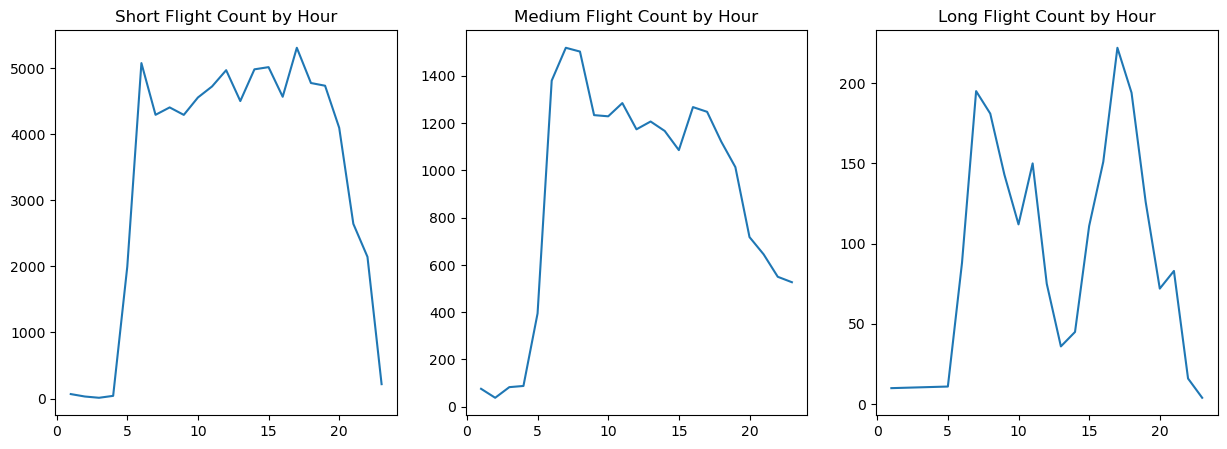

In [19]:
tmp = dirty_df[dirty_df['crs_elapsed_time'] < 181][['crs_dep_time','crs_elapsed_time']]
tmp.crs_dep_time = tmp.crs_dep_time.apply(get_hour)
a = tmp.groupby(by='crs_dep_time').count()

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(a.index,a.crs_elapsed_time)
axs[0].set_title('Short Flight Count by Hour')
print('The most short flights are at', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].index[0], 'with', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].values[0][0],'flights.')

tmp = dirty_df[(dirty_df['crs_elapsed_time'] > 180) & (dirty_df['crs_elapsed_time'] < 361)][['crs_dep_time','crs_elapsed_time']]
tmp.crs_dep_time = tmp.crs_dep_time.apply(get_hour)
a = tmp.groupby(by='crs_dep_time').count()

axs[1].plot(a.index,a.crs_elapsed_time)
axs[1].set_title('Medium Flight Count by Hour')
print('The most medium flights are at', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].index[0], 'with', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].values[0][0],'flights.')

tmp = dirty_df[(dirty_df['crs_elapsed_time'] > 360)][['crs_dep_time','crs_elapsed_time']]
tmp.crs_dep_time = tmp.crs_dep_time.apply(get_hour)
a = tmp.groupby(by='crs_dep_time').count()

axs[2].plot(a.index,a.crs_elapsed_time)
axs[2].set_title('Long Flight Count by Hour')
print('The most long flights are at', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].index[0], 'with', a[a.crs_elapsed_time == a.crs_elapsed_time.max()].values[0][0],'flights.')

#### **Task 9**: Find the top 10 the busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [94]:

dirty_df[['origin_city_name','origin_airport_id']].value_counts().head(10)

origin_city_name       origin_airport_id
Chicago, IL            13930                4745
Atlanta, GA            10397                4407
Dallas/Fort Worth, TX  11298                3818
Los Angeles, CA        12892                3591
Denver, CO             11292                3590
Charlotte, NC          11057                3214
Phoenix, AZ            14107                2644
San Francisco, CA      14771                2539
Seattle, WA            14747                2475
Las Vegas, NV          12889                2382
dtype: int64

In [92]:
passengers = pd.read_csv('../data/messy_data_EDA/passenger_jan.csv')
passengers.groupby(by='origin_airport_id').passengers.sum().sort_values(ascending=False).head(10)

origin_airport_id
10397    3885123
12892    3286079
13930    2605553
11298    2595846
11292    2410124
12478    2260121
13204    2040418
13303    1961589
14771    1952648
12889    1899766
Name: passengers, dtype: int64

In [96]:
dirty_df[['origin_city_name','origin_airport_id']].value_counts().head(10).sum()

33405

No, Chicago sees the most traffic but the 3rd most passengers, Atlanta is the second most traffic and most passengers. LA is the fourth highest traffic and second highest passengers.

The top 10 airports are responsible for 33.405% of the traffic.

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [127]:
dirty_df['total_delay'] = dirty_df.dep_delay + dirty_df.arr_delay
avg_delay_carrier = dirty_df.groupby(by='op_unique_carrier').total_delay.mean()
sum_dist_carrier = dirty_df.groupby(by='op_unique_carrier').distance.sum()
pass_carr = pd.read_csv('../data/messy_data_EDA/passengers_carrier_jan.csv')
sum_pass_carrier = pass_carr.groupby(by='unique_carrier').passengers.sum()
fuel = pd.read_csv('../data/messy_data_EDA/fuel_jan_2019.csv',index_col=0)
fuel = fuel.groupby(by='unique_carrier').total_gallons.sum()
fuel_per_passenger_per_km = (fuel / sum_pass_carrier) / (sum_dist_carrier / 100)
result_df = pd.concat([avg_delay_carrier, fuel_per_passenger_per_km], axis=1)

In [150]:
result_df.dropna().sort_values(by='total_delay', ascending=False)


,total_delay,0
YV,26.773085,0.000000e+00
G4,26.411059,1.001869e-03
EV,25.243570,0.000000e+00
B6,23.498554,4.594130e-04
WN,22.079571,9.327913e-05
OO,20.504411,5.427908e-05
F9,19.280148,7.769636e-04
MQ,18.475565,0.000000e+00
UA,18.295321,3.240688e-04
AA,15.743076,1.867255e-04


In [147]:
result_df.dropna().sort_values(by=0, ascending=False)

,total_delay,0
HA,12.870201,2.644250e-03
G4,26.411059,1.001869e-03
F9,19.280148,7.769636e-04
NK,4.423032,5.590305e-04
B6,23.498554,4.594130e-04
AS,11.267764,4.486251e-04
UA,18.295321,3.240688e-04
DL,-3.043379,2.556081e-04
AA,15.743076,1.867255e-04
WN,22.079571,9.327913e-05


In [145]:
result_df.dropna().corr()

,total_delay,0
total_delay,1.00000,0.07657
0,0.07657,1.00000


There's a tiny correlation but nothing too strong.

## Are there multiple airports per city ?

In [165]:
print(' number of cities:',dirty_df.dest_city_name.nunique(),'\n','number of airports:',dirty_df.dest_airport_id.nunique())

 number of cities: 354 
 number of airports: 360


yes

In [197]:
dirty_df.op_unique_carrier.value_counts()

WN    19316
AA    12276
OO     9748
DL     9590
UA     7822
B6     4148
MQ     3806
AS     3645
OH     3559
YX     3502
YV     2794
9E     2662
NK     2579
EV     1905
QX     1655
F9     1617
G4     1501
PT     1461
CP     1261
ZW     1231
HA     1094
G7      997
AX      912
C5      750
EM      122
KS       47
Name: op_unique_carrier, dtype: int64

In [188]:
dirty_df.fl_date.value_counts()

2019-01-02    21752
2019-01-03    20952
2019-01-04    19466
2019-01-01    19215
2019-01-06     7172
2019-01-07     5838
2019-01-05     5605
Name: fl_date, dtype: int64